In [25]:
# Definition der benötigten Funktionspakete

import numpy as np
# import sdeint

import matplotlib.pyplot as plt
from scipy import signal
import os
import math

## Teil 1 - Rauschen und das Parseval-Theorem

In [26]:
# importiere Daten und teile in Vektoren auf

data = np.loadtxt("signal and noise example.txt")
t = data[:,0]
x = data[:,1]

In [27]:
# extrahiere nützliche Parameter

sampling_time = t[1]-t[0]
total_time = t[-1]
N = len(x)
n_vector = np.linspace(1,N,N)
print(sampling_time)
print(total_time)

0.001
100.0


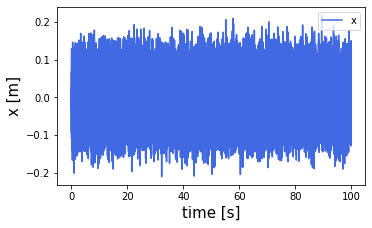

In [28]:
plt.figure(figsize=(5,3))
plt.plot(t, x, color='royalblue', label="x")
plt.xlabel('time [s]', fontsize=15)
plt.ylabel('x [m]', fontsize=15)
plt.legend(loc = 'upper right')
plt.tight_layout(pad=0.1)
plt.savefig('parseval-fig1.pdf')
plt.show()

In [29]:
# berechne PSD von x

fx,PSDx = signal.periodogram(x,1/sampling_time,return_onesided=True,scaling='density')
Lx = len(fx)
print(Lx)



50001


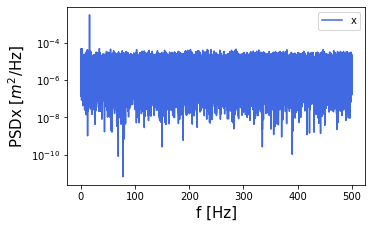

In [30]:
plt.figure(figsize=(5,3))
plt.plot(fx[1:-1], PSDx[1:-1], color='royalblue', label="x")
plt.xlabel('f [Hz]', fontsize=15)
plt.ylabel(r'PSDx $[m^2/$Hz]', fontsize=15)
plt.legend()
plt.yscale("log")
plt.tight_layout(pad=0.1)
plt.savefig('parseval-fig2.pdf')
plt.show()

In [31]:
print(fx[np.argmax(PSDx[1:-1])])

15.749842501574983


In [32]:
# berechne Mittelwerte der PSDs

PSD_average_x = np.average(PSDx)


print(PSD_average_x)


5.103754820840547e-06


In [33]:
# verwende verschiedene Methoden, um die Varianz zu berechnen (check Parseval-Theorem)

dfx = np.absolute(fx[2]-fx[1])
variance1 = sum(PSDx)*dfx

variance2 = np.var(x)

variance3 = PSD_average_x*fx[-1]

print(variance1)
print(variance2)
print(variance3)

0.0025519029289391903
0.0025519029289391955
0.0025518518919013544


## Teil 2 - Filtern

In [34]:
# implementiere einen einfachen Tiefpassfilter durch mitteln (Einfacheit halber fahren wir mit x weiter statt mit U_mess)

N_num = 10 # Anzahl Werte vor und nach jedem originalen Wert, die gemittelt werden
N_av = 2*N_num+1 # Filterlänge

x_filtered = x.copy()
    
for n in range(N_num,N-N_num):
    x_filtered[n] = sum(x[n-N_num:n+N_num+1])/N_av # Mittelwert


variance_filtered = np.var(x_filtered[N_num:N-N_num]) # Varianz der gefilterten Timetrace
reduction = np.sqrt(variance3/variance_filtered) # Verhältnis der Varianzen bevor und nach dem filtern
print(reduction)
print(np.sqrt(N_av)) # erwartete Reduktion der Varianz für unkorrelierte Werte (Fehler des Mittelwertes)


4.060924392527528
4.58257569495584


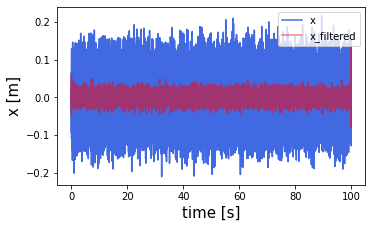

In [35]:
plt.figure(figsize=(5,3))
plt.plot(t, x, color='royalblue', label="x")
plt.plot(t, x_filtered, color='red', label="x_filtered", alpha=0.5)
plt.legend(loc='upper right')
plt.xlabel('time [s]', fontsize=15)
plt.ylabel('x [m]', fontsize=15)
plt.tight_layout(pad=0.1)
plt.savefig('parseval_fig3.pdf')
plt.show()

In [36]:
# berechne gefilterte PSD

fx,PSDx_filtered = signal.periodogram(x_filtered,1/sampling_time,return_onesided=True)

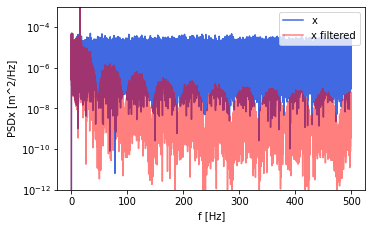

In [37]:
plt.figure(figsize=(5,3))
plt.plot(fx, PSDx, color='royalblue', label="x")
plt.plot(fx, PSDx_filtered, color='red', label="x filtered", alpha=0.5)
plt.xlabel('f [Hz]')
plt.ylabel('PSDx [m^2/Hz]')
plt.legend(loc='upper right')
plt.yscale("log")
plt.ylim([1e-12, 1e-3])
plt.tight_layout(pad=0.1)
plt.savefig('parseval_fig4.pdf')
plt.show()

In [38]:
len(PSDx)

50001